#PiAIML HW 1

Thomas Dou - 662039950 - dout@rpi.edu

# TASK 1:

##Question 1

The MLE function is given as:

$\texttt{argmax}_\textbf{w}\Pi_{i=1}^{N}P(\mathbf{x}^i|\mathbf{w})$

Logistic regression can be modeled as a classifier on bernoulli random variables. Using the Bernoulli r.v. PDF, we get:

$P(y^i,\mathbf{x}^i|\mathbf{w}) = \texttt{Ber}(y^i|σ(\mathbf{w}^\top \mathbf{x}^i+b)) = σ(\mathbf{w}^\top \mathbf{x}^i+b)^{y^i}(1-σ(\mathbf{w}^\top \mathbf{x}^i+b))^{1-y^i}$

Plugging it into the MLE function, we get:

$\Pi_{i=1}^{N}σ(\mathbf{w}^\top \mathbf{x}^i+b)^{y^i}(1-σ(\mathbf{w}^\top \mathbf{x}^i+b))^{1-y^i}$

Applying $log$ to convert it to summation:

$log(\Pi_{i=1}^{N}σ(\mathbf{w}^\top \mathbf{x}^i+b)^{y^i}(1-σ(\mathbf{w}^\top \mathbf{x}^i+b))^{1-y^i})
\\=\Sigma_{i=1}^N log(σ(\mathbf{w}^\top \mathbf{x}^i+b)^{y^i}(1-σ(\mathbf{w}^\top \mathbf{x}^i+b))^{1-y^i})
\\=\Sigma_{i=1}^N log(σ(\mathbf{w}^\top \mathbf{x}^i+b)^{y^i}) + log((1-σ(\mathbf{w}^\top \mathbf{x}^i+b))^{1-y^i})
\\=\Sigma_{i=1}^N y^i log(σ(\mathbf{w}^\top \mathbf{x}^i+b))+(1-y^i)(log(1-σ(\mathbf{w}^\top \mathbf{x}^i+b)))$

which is the objective function for logistic regression. This deviates from the MAP technique which minimizes loss while modeling classified variables in as a Gaussian distribution rather than as Bernoulli random variables. [1]

##Question 2

One possible case would be classifying wines into good and bad wines, modeled on chemical indicators. I was able to find a dataset of wine classifications from the UC Irvine Machine Learning Repository [2]. In the dataset, each dimension corresponds to some chemical indicator and datapoints are labeled 1-10 indicating quality (1 being worst, 10 being best). For my purposes, I want to perform binary classification on the wines, which would probably involve labeling data into based on whether the rating is 5 or above or not, making a binary classification algorithm like logistic regression ideal. But one example of an algorithm capable of multi-class classification is k-Nearest Neighbor [3]. Though not a classification model, linear regression can also be used with this dataset. It would yield a continuous inference function for the quality rating.

##Question 3

This dataset has 11 features, not including the label. The datapoint at index $i$ corresponds to the $\mathbf{x}^i$ vectors. The label of that datapoint is $y^i$ and classifier's weights are in vector $\mathbf{w}$.

[1] Used these notes as reference for T1Q1. (https://zstevenwu.com/courses/s20/csci5525/resources/slides/lecture05.pdf) as well as textbook.

[2] Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Wine Quality [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C56S3T.

[3] https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm


#TASK 2
##Question 1
- Dataset link: https://archive.ics.uci.edu/dataset/186/wine+quality
- I will be using the white wine dataset since it is larger and I do intend to preprocess the data by modifying the label so that it's binary indicating if the rating was >5 or not.

##Question 2:


In [41]:
with open('winequality_cleaned.csv') as file:
  raw_data = file.readlines()

print(raw_data[:1000])

['"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n', '7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;0\n', '6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;0\n', '8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;0\n', '7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;0\n', '7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;0\n', '8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;0\n', '6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;0\n', '7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;0\n', '6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;0\n', '8.1;0.22;0.43;1.5;0.044;28;129;0.9938;3.22;0.45;11;0\n', '8.1;0.27;0.41;1.45;0.033;11;63;0.9908;2.99;0.56;12;0\n', '8.6;0.23;0.4;4.2;0.035;17;109;0.9947;3.14;0.53;9.7;0\n', '7.9;0.18;0.37;1.2;0.04;16;75;0.992;3.18;0.63;10.8;0\n', '6.6;0.16;0.4;1.5;0.044;48;143;0.9912;3.54;0.52;12.4;1\n', '8.3;0.42;0.62;19.25;0.04;4

In [42]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(''.join(raw_data)), sep=';')
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        0  
1      9.5        0  
2     10.1        0 

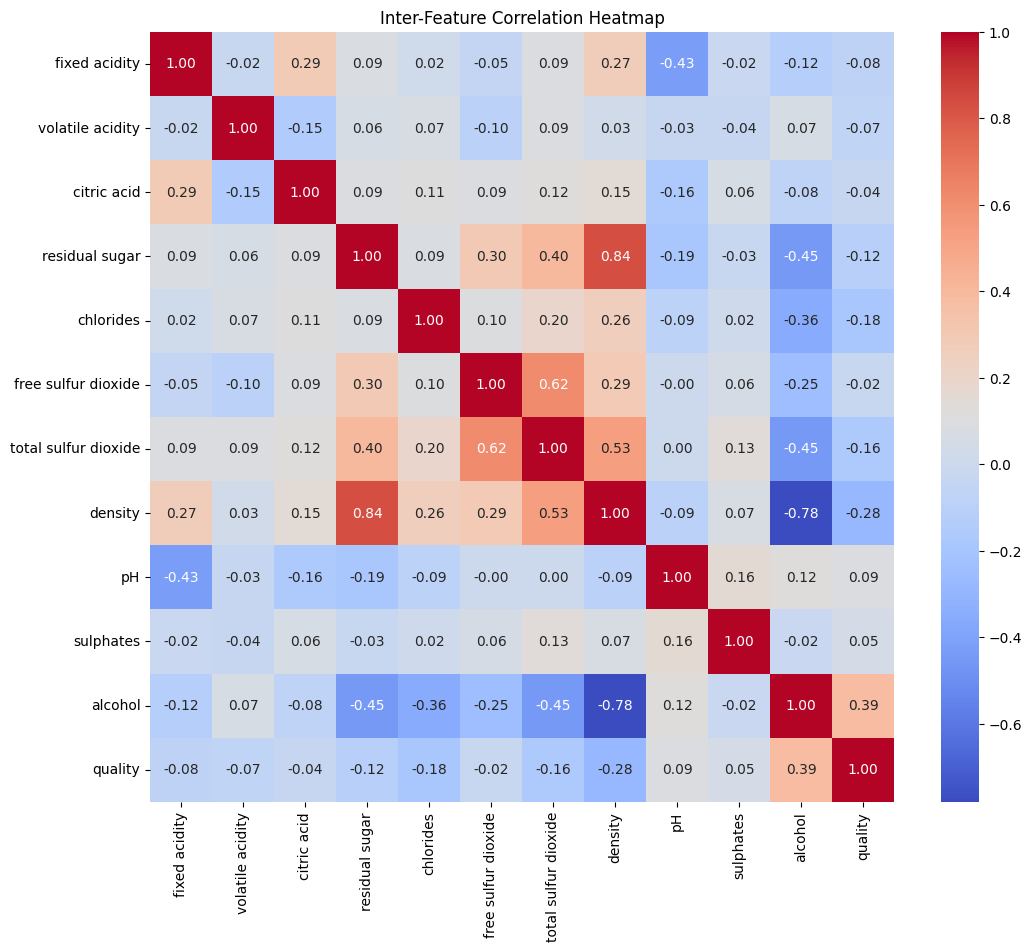

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Inter-Feature Correlation Heatmap')
plt.show()

Inter-feature correlation heat map:

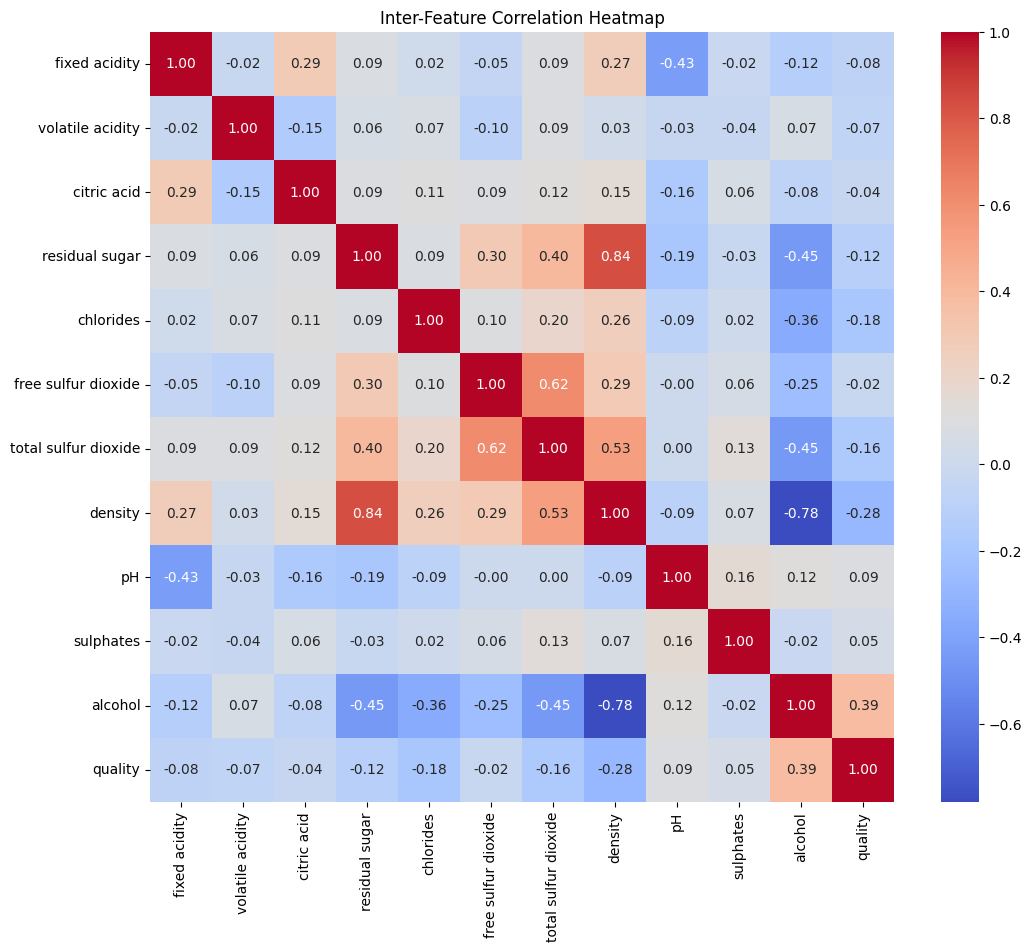

In [44]:
def VIF(R):
  return 1.0/(1.0-R**2)

for feature1 in correlation_matrix.iterrows():
    #print(feature1)
    for feature2 in correlation_matrix.iterrows():
      if feature1[0] == feature2[0]:
        continue
      R = correlation_matrix[feature1[0]][feature2[0]]
      print(feature1[0], feature2[0], VIF(R))

fixed acidity volatile acidity 1.0005154325138126
fixed acidity citric acid 1.0912568755688943
fixed acidity residual sugar 1.0079879875583617
fixed acidity chlorides 1.0005332311269268
fixed acidity free sulfur dioxide 1.00244591881617
fixed acidity total sulfur dioxide 1.008363061211636
fixed acidity density 1.0757321302960494
fixed acidity pH 1.2215311238965478
fixed acidity sulphates 1.0002939683274161
fixed acidity alcohol 1.014828929915799
fixed acidity quality 1.0065629721241907
volatile acidity fixed acidity 1.0005154325138126
volatile acidity citric acid 1.0228523861257404
volatile acidity residual sugar 1.004149847586862
volatile acidity chlorides 1.0049967248373335
volatile acidity free sulfur dioxide 1.0095007307451882
volatile acidity total sulfur dioxide 1.0080314273900375
volatile acidity density 1.00073570147451
volatile acidity pH 1.0010196293170048
volatile acidity sulphates 1.0012781320174589
volatile acidity alcohol 1.004606845476078
volatile acidity quality 1.00453

Since no features have a VIF score >4, steps to address co-linearity are not necessary. However, some have relatively high co-linearity, namely alcohol content with density (VIF score = 2.56) and residual sugar with density (VIF score = 3.37).

## Q3

Building structured heat map::

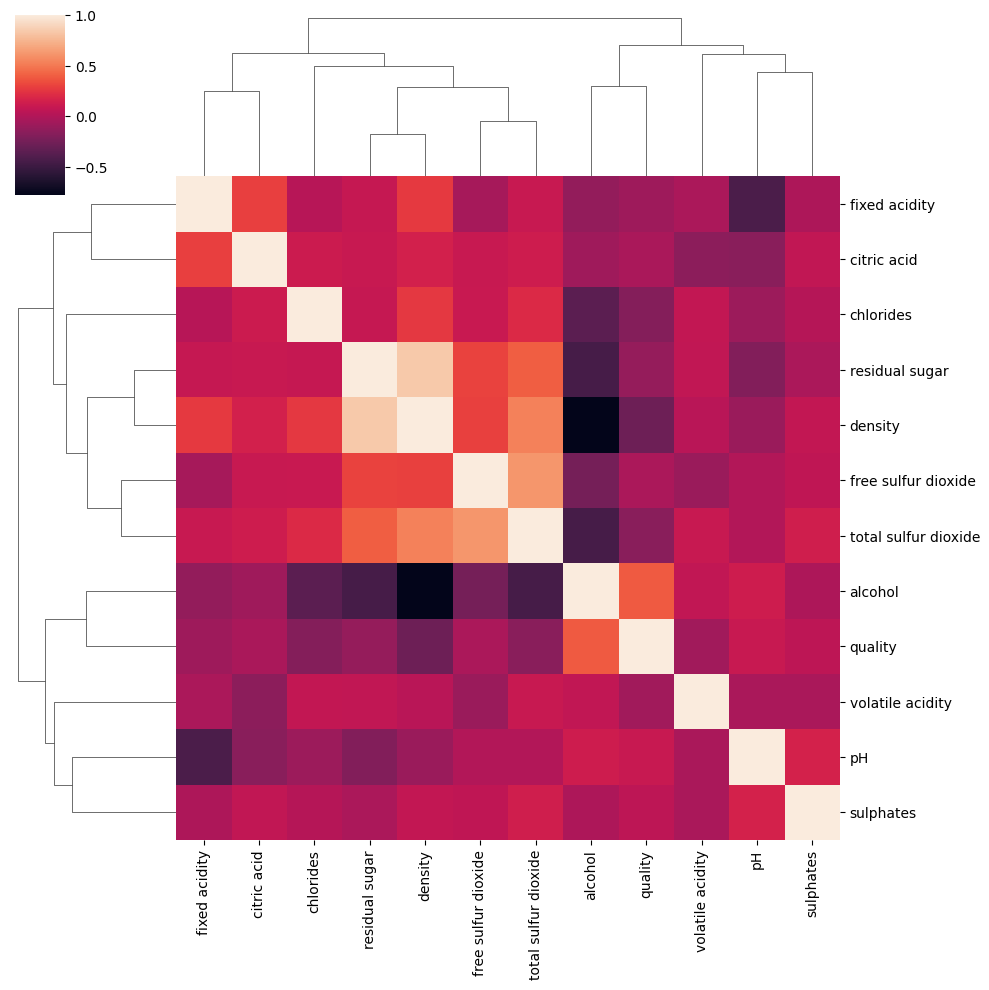

In [45]:
import seaborn as sns

g = sns.clustermap(correlation_matrix)
plt.show()

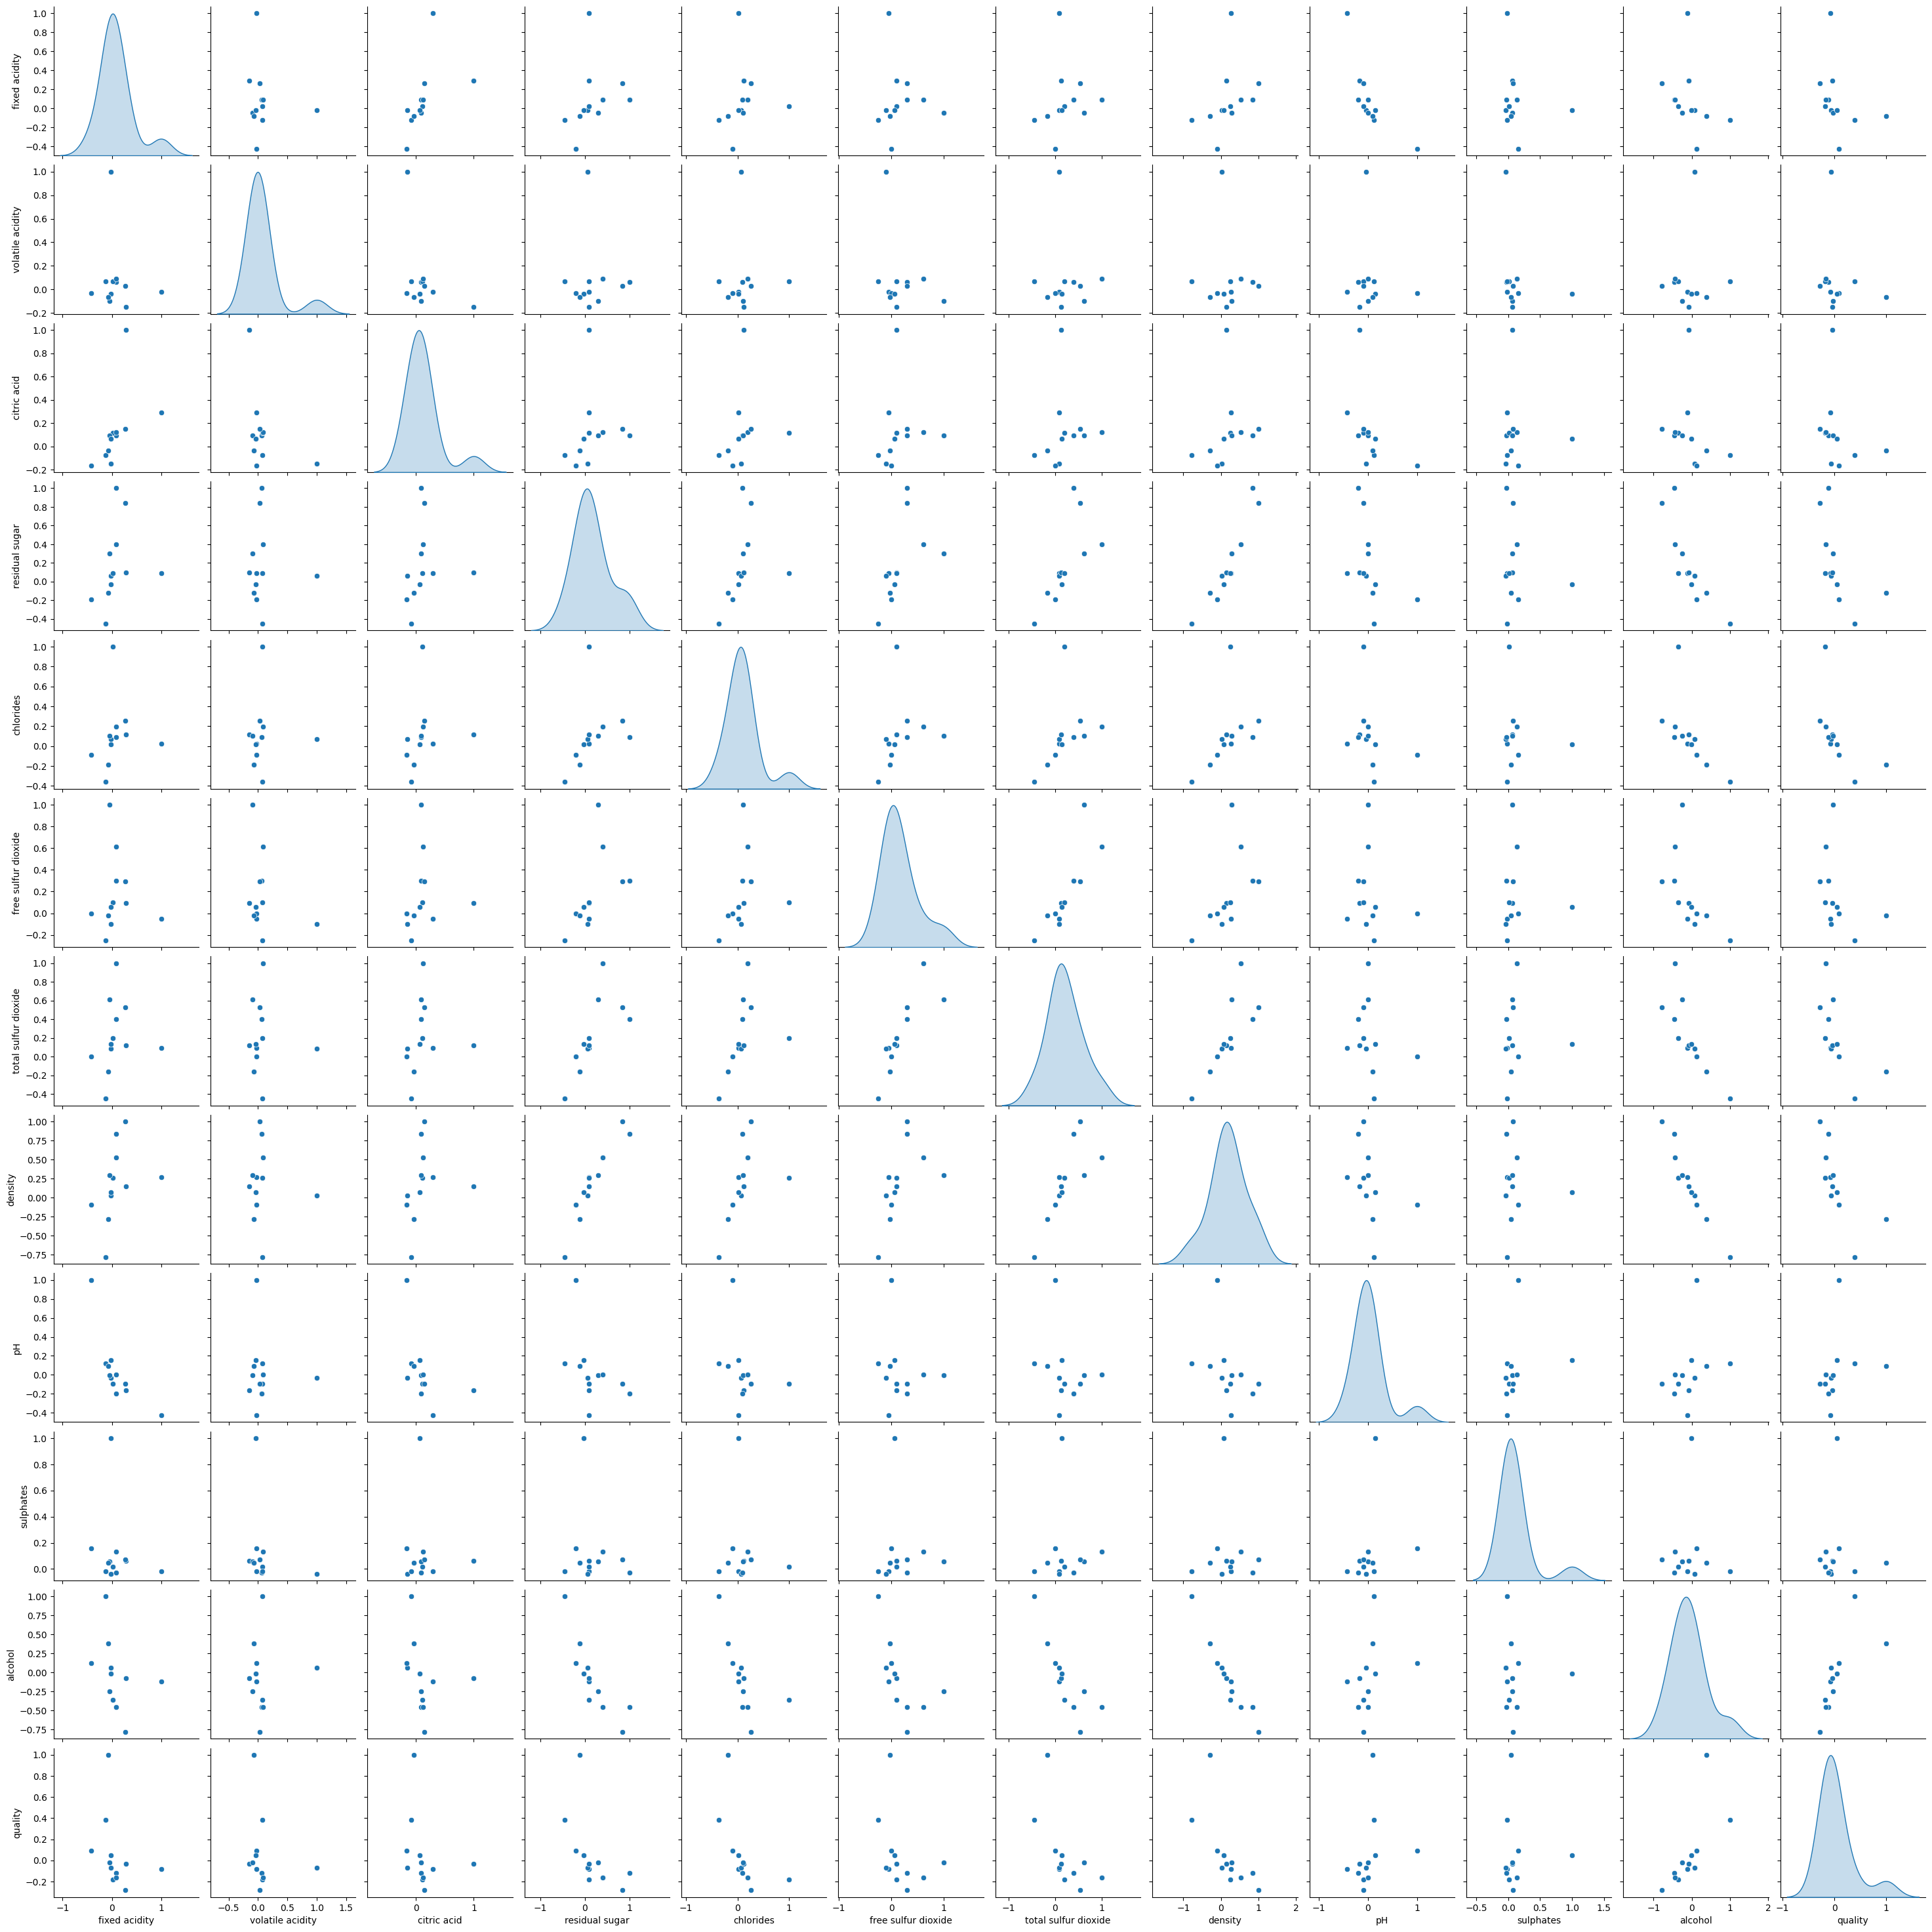

In [46]:
sns.pairplot(correlation_matrix, diag_kind='kde')
plt.show()

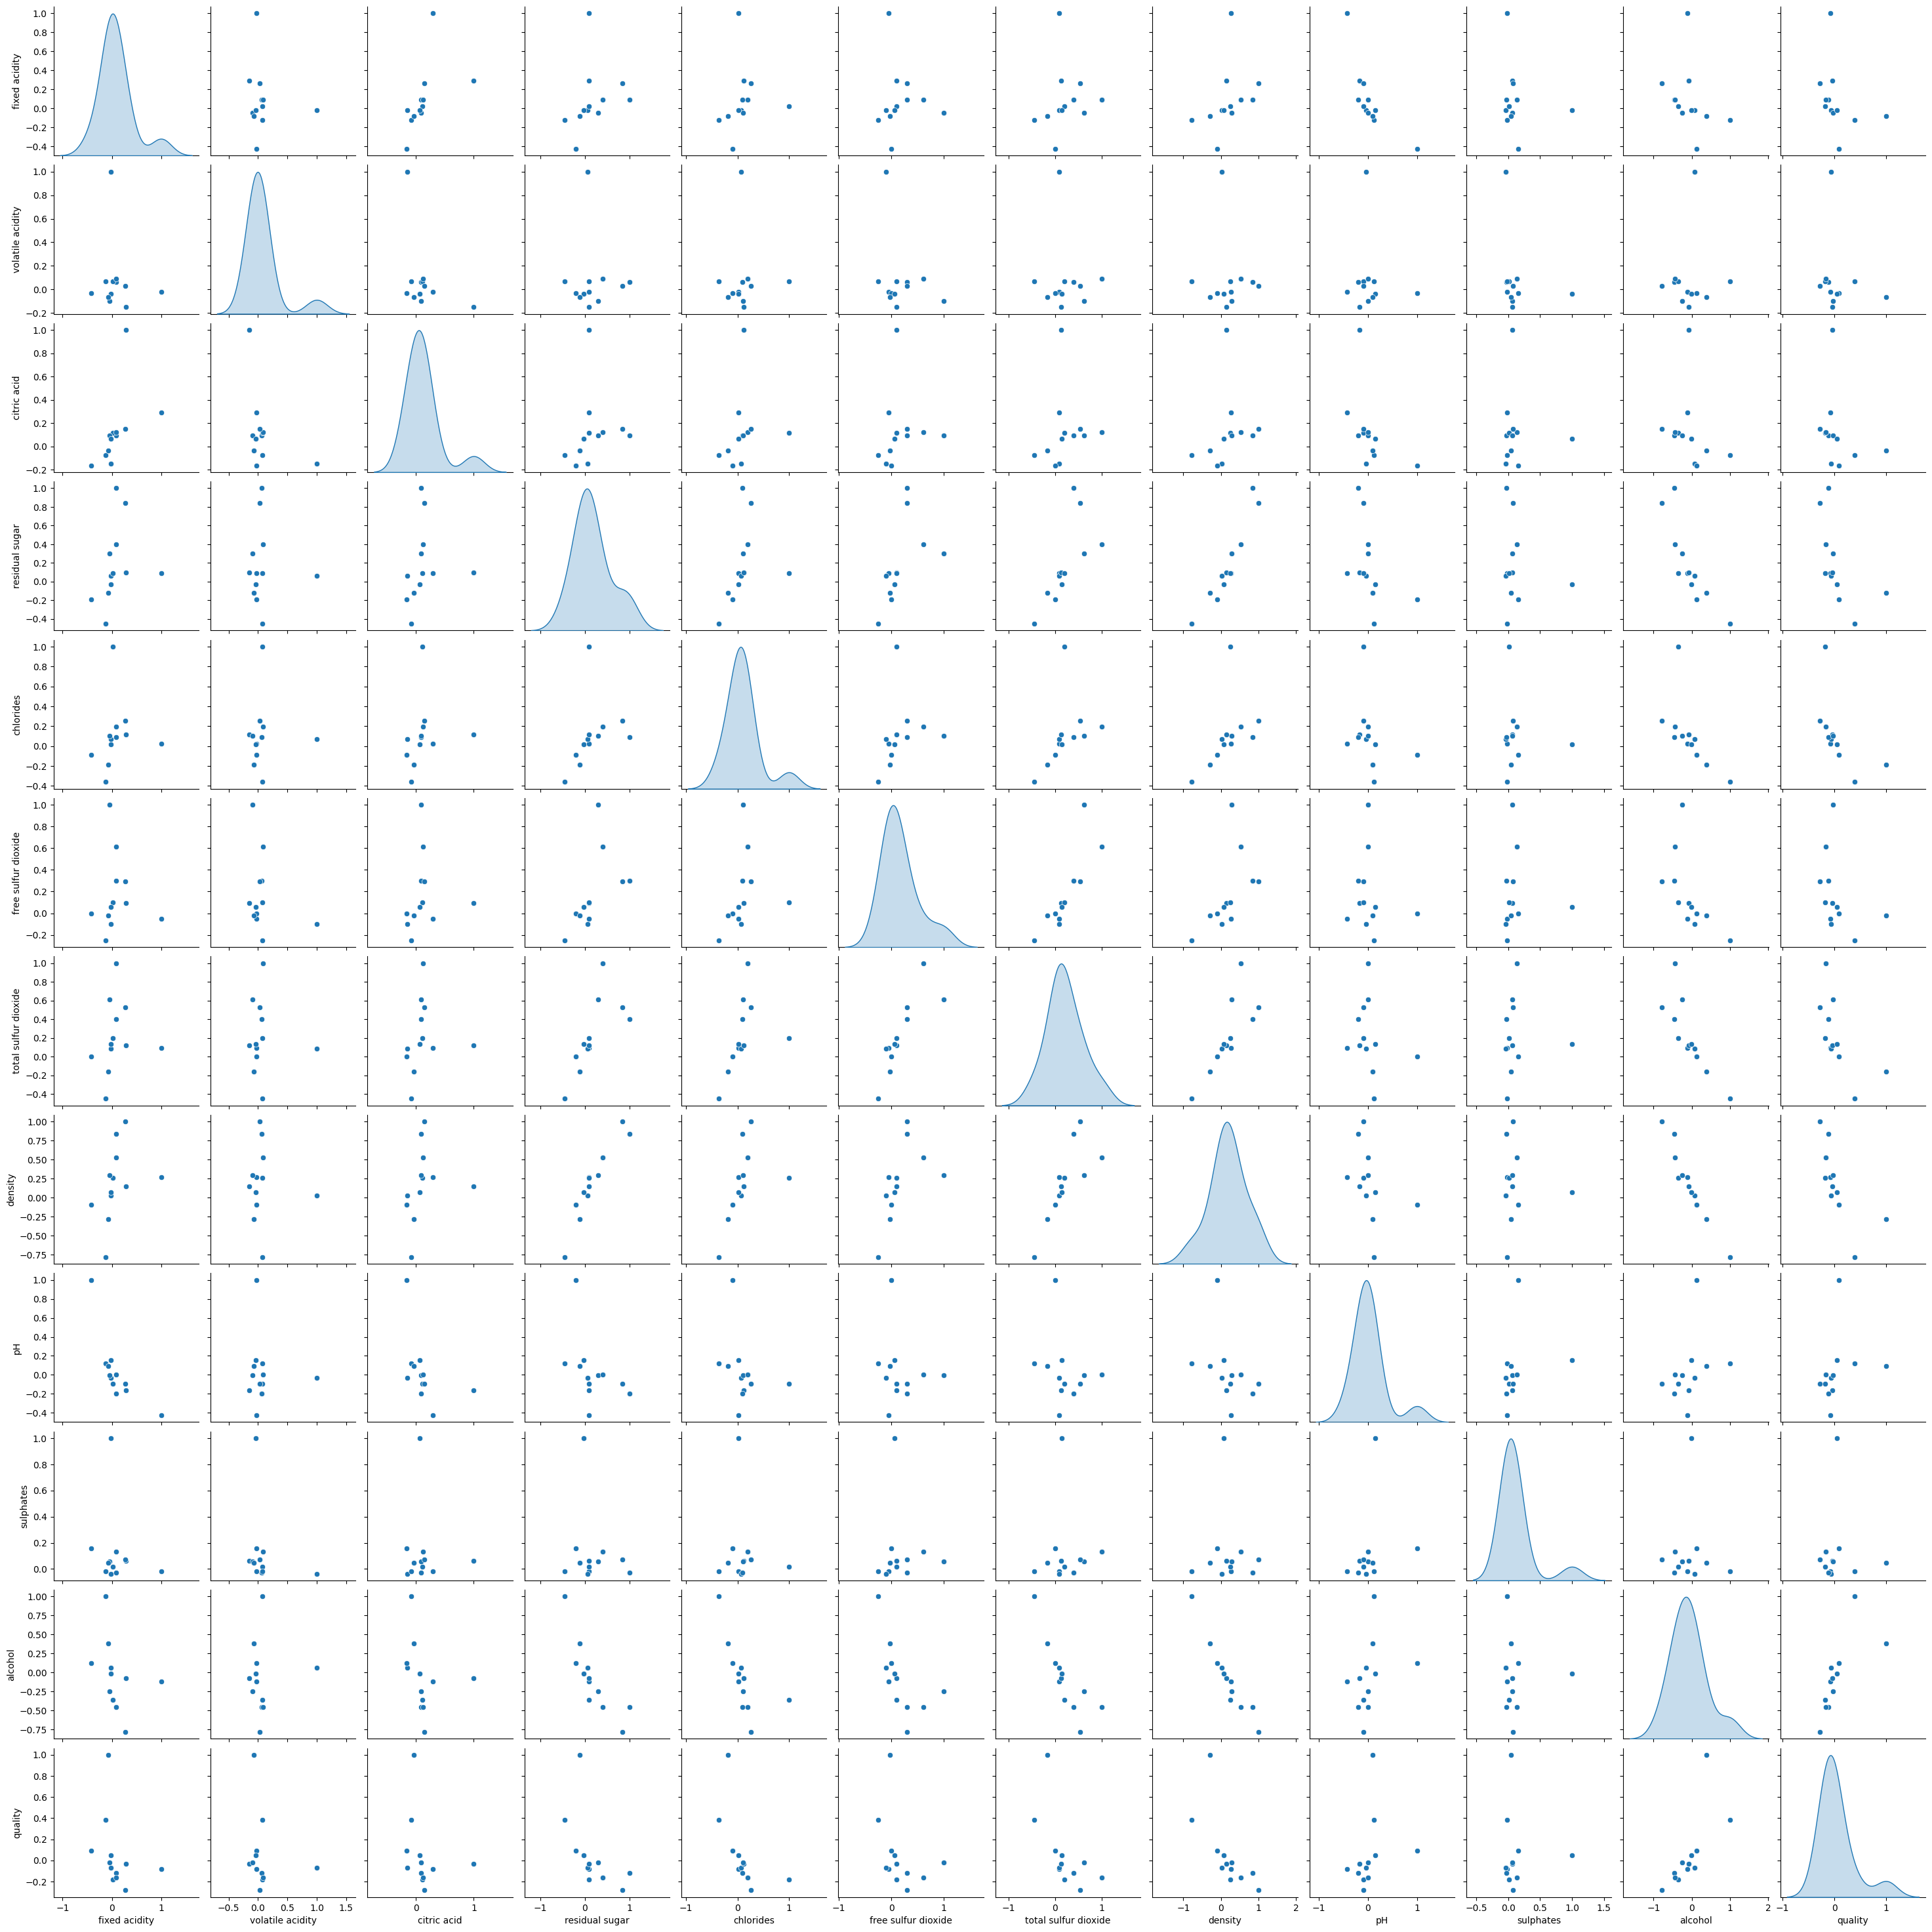

# Task 3


## Question 1

Implementing logistic regression with gradient descent from scratch:

(Rather than calculating the gradient in code, I'm hard coding it using function: $\frac{1}{n}\Sigma_{i=1}^{n}(y^i-(\mathbf{w}^\top \mathbf{x}^i+b))$

Psuedo-code is from:
- Abu-Mostafa, Y. S., Magdon-Ismail, M., & Lin, H.-T. (2012). Learning from data: A short course, p. 95

Further, at the suggestion of Gemini in Colab, I scaled the data, though the fitting functions were written by me.)

In [47]:
from sklearn.preprocessing import StandardScaler



X = df.iloc[0:,:-1].to_numpy()
y = df.iloc[0:, -1].to_numpy()

#Everything past here in this cell is AI generated#

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled X shape:", X_scaled.shape)
print("First 5 rows of scaled X:\n", X_scaled[:5])

Scaled X shape: (4898, 11)
First 5 rows of scaled X:
 [[ 1.72096961e-01 -8.17699008e-02  2.13280202e-01  2.82134917e+00
  -3.53550004e-02  5.69931577e-01  7.44565035e-01  2.33151201e+00
  -1.24692128e+00 -3.49184257e-01 -1.39315246e+00]
 [-6.57501128e-01  2.15895632e-01  4.80011213e-02 -9.44765273e-01
   1.47747079e-01 -1.25301866e+00 -1.49684624e-01 -9.15417164e-03
   7.40028640e-01  1.34184656e-03 -8.24275678e-01]
 [ 1.47575110e+00  1.74519434e-02  5.43838363e-01  1.00282190e-01
   1.93522599e-01 -3.12141119e-01 -9.73335626e-01  3.58664800e-01
   4.75101984e-01 -4.36815783e-01 -3.36667007e-01]
 [ 4.09124986e-01 -4.78657278e-01 -1.17277959e-01  4.15768217e-01
   5.59726758e-01  6.87541270e-01  1.12109121e+00  5.25855242e-01
   1.14803354e-02 -7.87341887e-01 -4.99203231e-01]
 [ 4.09124986e-01 -4.78657278e-01 -1.17277959e-01  4.15768217e-01
   5.59726758e-01  6.87541270e-01  1.12109121e+00  5.25855242e-01
   1.14803354e-02 -7.87341887e-01 -4.99203231e-01]]


In [73]:
import numpy as np

def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def loss(h, y):
    eps = 1e-15
    h = np.clip(h, eps, 1 - eps)
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def error(h, y: np.array):
  return (h - y).mean()

def fit_BGD(X, y_true, T, nu):
  n_samples, n_features = X.shape
  w = np.zeros(n_features)
  bias = 0.0

  errors = 0

  prev_loss = np.inf

  for t in range(T):
    y_pred = sigmoid(X @ w + bias)
    current_loss = loss(y_pred, y_true)

    gradient_w = (1/n_samples) * (X.T @ (y_pred - y_true))
    gradient_b = (1/n_samples) * np.sum(y_pred - y_true)


    bias -= nu * gradient_b
    w += -1 * gradient_w * nu
    if t % 500 == 0:
      print(f"Iteration {t+1}: w[0]={w[0]:.5f}, loss={current_loss:.5f}, error={error(y_pred, y_true):.5f}")
    prev_loss = current_loss

  return w, bias


In [49]:
print("Batch Gradient Descent:")
w_final_batch_GD = fit_BGD(X_scaled, y, 10000, 0.01)

print("Final weights:", w_final_batch_GD)

Batch Gradient Descent:
Iteration 1: w[0]=-0.00033, loss=0.69315, error=0.28359
Iteration 501: w[0]=-0.03239, loss=0.47899, error=0.09790
Iteration 1001: w[0]=-0.01778, loss=0.44663, error=0.04474
Iteration 1501: w[0]=0.00021, loss=0.43661, error=0.02433
Iteration 2001: w[0]=0.01811, loss=0.43229, error=0.01484
Iteration 2501: w[0]=0.03472, loss=0.43006, error=0.00982
Iteration 3001: w[0]=0.04959, loss=0.42878, error=0.00690
Iteration 3501: w[0]=0.06271, loss=0.42800, error=0.00507
Iteration 4001: w[0]=0.07419, loss=0.42749, error=0.00385
Iteration 4501: w[0]=0.08422, loss=0.42715, error=0.00299
Iteration 5001: w[0]=0.09301, loss=0.42691, error=0.00236
Iteration 5501: w[0]=0.10074, loss=0.42673, error=0.00188
Iteration 6001: w[0]=0.10758, loss=0.42659, error=0.00152
Iteration 6501: w[0]=0.11368, loss=0.42648, error=0.00123
Iteration 7001: w[0]=0.11917, loss=0.42639, error=0.00100
Iteration 7501: w[0]=0.12414, loss=0.42631, error=0.00081
Iteration 8001: w[0]=0.12869, loss=0.42624, error

## Question 2:

Implementing stochastic gradient descent:

In [50]:
from random import randrange

def fit_SGD(X, y_true, T, nu):
  n_samples, n_features = X.shape
  w = np.zeros(n_features)
  bias = 0.0

  errors = 0

  prev_loss = np.inf

  for t in range(T):

    i = randrange(n_samples)

    #y_pred = sigmoid(X @ w + bias)
    x = X[i]
    y_pred = sigmoid(np.dot(w,x) + bias)
    current_loss = loss(y_pred, y_true[i])

    gradient_w = (y_pred - y_true[i]) * x
    gradient_b = y_pred - y_true[i]


    bias -= nu * gradient_b
    w += -1 * gradient_w * nu
    if t % 500 == 0:
      print(f"Iteration {t+1}: w[0]={w[0]:.5f}, loss (w/r to random sample)={current_loss:.5f}, error={error(y_pred, y_true[i]):.5f}")
    prev_loss = current_loss

  return w, bias


w_final_batch_SGD = fit_SGD(X_scaled, y, 10000, 0.01)

print("Final weights:", w_final_batch_SGD)


Iteration 1: w[0]=-0.01271, loss (w/r to random sample)=0.69315, error=0.50000
Iteration 501: w[0]=0.04157, loss (w/r to random sample)=0.31582, error=0.27081
Iteration 1001: w[0]=0.00581, loss (w/r to random sample)=0.76494, error=-0.53464
Iteration 1501: w[0]=-0.01006, loss (w/r to random sample)=2.27720, error=-0.89743
Iteration 2001: w[0]=0.01367, loss (w/r to random sample)=0.52735, error=0.40983
Iteration 2501: w[0]=0.12419, loss (w/r to random sample)=0.30003, error=0.25921
Iteration 3001: w[0]=0.05689, loss (w/r to random sample)=0.16637, error=0.15327
Iteration 3501: w[0]=0.12325, loss (w/r to random sample)=0.12820, error=0.12033
Iteration 4001: w[0]=0.07613, loss (w/r to random sample)=0.07731, error=0.07440
Iteration 4501: w[0]=0.04507, loss (w/r to random sample)=0.03929, error=0.03853
Iteration 5001: w[0]=0.08422, loss (w/r to random sample)=0.11133, error=0.10536
Iteration 5501: w[0]=0.10668, loss (w/r to random sample)=0.24748, error=0.21923
Iteration 6001: w[0]=0.10880

Implementing mini-batch gradient descent:

In [51]:
def fit_mBGD(X, y_true, T, batch_size, nu):
  n_samples, n_features = X.shape
  w = np.zeros(n_features)
  bias = 0.0

  errors = 0

  prev_loss = np.inf

  i_0 = 0
  i_1 = n_samples % batch_size

  while(i_1 < n_samples):

    X_batch = X[i_0 : i_1]
    y_true_batch = y_true[i_0 : i_1]

    y_pred = sigmoid(X_batch @ w + bias)
    current_loss = loss(y_pred, y_true_batch)

    gradient_w = (1/n_samples) * (X_batch.T @ (y_pred - y_true_batch))
    gradient_b = (1/n_samples) * np.sum(y_pred - y_true_batch)


    bias -= nu * gradient_b
    w += -1 * gradient_w * nu
    print(f"w[0]={w[0]:.5f}, loss={current_loss:.5f}, error={error(y_pred, y_true_batch):.5f}")
    prev_loss = current_loss

    i_0 = i_1
    i_1 += batch_size
    if i_1 > n_samples:
      i_1 = n_samples

  return w, bias


w_final_batch_mBGD = fit_mBGD(X_scaled, y, 10000, 1, 0.01)

print("Final weights:", w_final_batch_mBGD)

w[0]=0.00000, loss=nan, error=nan
w[0]=-0.00000, loss=0.69315, error=0.50000
w[0]=0.00000, loss=0.69315, error=0.50000
w[0]=-0.00000, loss=0.69315, error=0.50000
w[0]=-0.00000, loss=0.69314, error=0.50000
w[0]=-0.00000, loss=0.69314, error=0.50000
w[0]=-0.00000, loss=0.69314, error=0.50000
w[0]=-0.00000, loss=0.69314, error=0.50000
w[0]=-0.00000, loss=0.69313, error=0.49999
w[0]=-0.00000, loss=0.69314, error=0.50000
w[0]=-0.00000, loss=0.69314, error=0.50000
w[0]=-0.00001, loss=0.69315, error=0.50000
w[0]=-0.00001, loss=0.69313, error=0.49999
w[0]=-0.00001, loss=0.69314, error=0.50000
w[0]=-0.00001, loss=0.69314, error=-0.50000
w[0]=-0.00001, loss=0.69312, error=0.49999
w[0]=-0.00001, loss=0.69314, error=-0.50000
w[0]=-0.00001, loss=0.69315, error=0.50000
w[0]=-0.00001, loss=0.69314, error=-0.50000
w[0]=-0.00001, loss=0.69315, error=0.50000
w[0]=-0.00001, loss=0.69314, error=0.49999
w[0]=-0.00001, loss=0.69313, error=-0.49999
w[0]=-0.00001, loss=0.69314, error=-0.50000
w[0]=-0.00001, l

/tmp/ipython-input-2981224239.py:9: RuntimeWarning: Mean of empty slice.
  return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipython-input-2981224239.py:12: RuntimeWarning: Mean of empty slice.
  return (h - y).mean()


w[0]=-0.00027, loss=0.69288, error=0.49987
w[0]=-0.00027, loss=0.69290, error=-0.49987
w[0]=-0.00027, loss=0.69203, error=0.49944
w[0]=-0.00027, loss=0.69286, error=0.49986
w[0]=-0.00028, loss=0.69205, error=0.49945
w[0]=-0.00028, loss=0.69202, error=0.49944
w[0]=-0.00028, loss=0.69313, error=0.49999
w[0]=-0.00028, loss=0.69160, error=0.49923
w[0]=-0.00028, loss=0.69176, error=0.49931
w[0]=-0.00028, loss=0.69287, error=0.49986
w[0]=-0.00028, loss=0.69288, error=-0.49987
w[0]=-0.00028, loss=0.69288, error=-0.49986
w[0]=-0.00028, loss=0.69203, error=0.49944
w[0]=-0.00028, loss=0.69251, error=0.49968
w[0]=-0.00028, loss=0.69259, error=0.49972
w[0]=-0.00028, loss=0.69206, error=0.49945
w[0]=-0.00028, loss=0.69301, error=-0.49993
w[0]=-0.00029, loss=0.69258, error=0.49972
w[0]=-0.00028, loss=0.69286, error=-0.49986
w[0]=-0.00028, loss=0.69282, error=-0.49984
w[0]=-0.00029, loss=0.69291, error=0.49988
w[0]=-0.00029, loss=0.69276, error=-0.49981
w[0]=-0.00029, loss=0.69171, error=0.49928
w[0]

## Discussion:
Between the three implementations, batch GD yields the best in sample error. There are likely issues with my stochastic and mini-batch gradient descent implementations. The stochastic gradient descent implementation performs only marginally worse than the batch gradient descent. I believe integrating some sort of optimization algorithm that inflences the gradient is standard practice, however, which may imrpove it. My mini-batch implementation is probably wrong. Its raw binary error is no better than chance.

Further, even on batch GD, the aggregate loss is rather high. This could be because of major outliers getting heavily punished by the loss function, which is likely commmon, as this is human annotated data bsed on subjective taste.

# TASK 4

For this task, I will be using Adam and RMSprop for optimization, as well as Adadelta.

## Questions 1 and 2 (I'm doing them together)

In [52]:
from math import floor

num_samples, num_features = X_scaled.shape

cutoff = floor(num_samples * 0.8)

X_train = X_scaled[:cutoff]
y_train = y[:cutoff]

X_test = X_scaled[cutoff:]
y_test = y[cutoff:]

#For actual testing purposes, dividing dataset into testing and training.

In [53]:
def fit_GD_adam(X, y_true, T, nu, beta1 = 0.9, beta2 = 0.999, eps = 1e-8):
  n_samples, n_features = X.shape
  w = np.zeros(n_features)
  bias = 0.0

  prev_loss = np.inf

  m_w = np.zeros_like(w)
  v_w = np.zeros_like(w)
  m_b = 0.0
  v_b = 0.0
  t = 0

  for t in range(T):
    y_pred = sigmoid(X @ w + bias)
    current_loss = loss(y_pred, y_true)

    grad_w = (1/n_samples) * (X.T @ (y_pred - y_true))
    grad_b = (1/n_samples) * np.sum(y_pred - y_true)


    t += 1
    m_w = beta1 * m_w + (1 - beta1) * grad_w
    v_w = beta2 * v_w + (1 - beta2) * (grad_w ** 2)
    m_b = beta1 * m_b + (1 - beta1) * grad_b
    v_b = beta2 * v_b + (1 - beta2) * (grad_b ** 2)

    m_w_hat = m_w / (1 - beta1 ** t)
    v_w_hat = v_w / (1 - beta2 ** t)
    m_b_hat = m_b / (1 - beta1 ** t)
    v_b_hat = v_b / (1 - beta2 ** t)

    w -= nu * m_w_hat / (np.sqrt(v_w_hat) + eps)
    bias -= nu * m_b_hat / (np.sqrt(v_b_hat) + eps)
    if t % 500 == 0:
      print(f"Iteration {t+1}: w[0]={w[0]:.5f}, loss={current_loss:.5f}, error={error(y_pred, y_true):.5f}")
    prev_loss = current_loss

  return w, bias

fit_GD_adam(X_train, y_train, 10000, 0.01)

Iteration 501: w[0]=0.16747, loss=0.41843, error=0.00132
Iteration 1001: w[0]=0.27367, loss=0.41745, error=0.00003
Iteration 1501: w[0]=0.33555, loss=0.41720, error=0.00001
Iteration 2001: w[0]=0.36024, loss=0.41717, error=0.00000
Iteration 2501: w[0]=0.36650, loss=0.41717, error=0.00000
Iteration 3001: w[0]=0.36742, loss=0.41717, error=0.00000
Iteration 3501: w[0]=0.36749, loss=0.41717, error=0.00000
Iteration 4001: w[0]=0.36749, loss=0.41717, error=0.00000
Iteration 4501: w[0]=0.36749, loss=0.41717, error=0.00000
Iteration 5001: w[0]=0.36749, loss=0.41717, error=0.00000
Iteration 5501: w[0]=0.36749, loss=0.41717, error=0.00000
Iteration 6001: w[0]=0.36749, loss=0.41717, error=0.00000
Iteration 6501: w[0]=0.36749, loss=0.41717, error=0.00000
Iteration 7001: w[0]=0.36749, loss=0.41717, error=-0.00000
Iteration 7501: w[0]=0.36749, loss=0.41717, error=0.00000
Iteration 8001: w[0]=0.36749, loss=0.41717, error=-0.00000
Iteration 8501: w[0]=0.36749, loss=0.41717, error=0.00000
Iteration 900

(array([ 0.36736696, -0.34616704, -0.11597933,  1.48008136, -0.20752571,
         0.16108541, -0.02649991, -1.95119433,  0.5039079 ,  0.29387659,
         0.29579382]),
 np.float64(-1.5956575471721506))

In [54]:
def fit_GD_RMSprop(X, y_true, T, nu, rho = 0.9, eps = 1e-8):
  n_samples, n_features = X.shape
  w = np.zeros(n_features)
  bias = 0.0

  prev_loss = np.inf

  v_w = np.zeros_like(w)
  v_b = 0.0

  for t in range(T):
    y_pred = sigmoid(X @ w + bias)
    current_loss = loss(y_pred, y_true)

    diff = y_pred - y_true
    grad_w = (X.T @ diff) / n_samples
    grad_b = diff.mean()

    v_w = rho * v_w + (1 - rho) * (grad_w ** 2)
    v_b = rho * v_b + (1 - rho) * (grad_b ** 2)
    w -= nu * grad_w / (np.sqrt(v_w) + eps)
    bias -= nu * grad_b / (np.sqrt(v_b) + eps)

    if t % 500 == 0:
      print(f"Iteration {t+1}: w[0]={w[0]:.5f}, loss={current_loss:.5f}, error={error(y_pred, y_true):.5f}")
    prev_loss = current_loss

  return w, bias

fit_GD_RMSprop(X_train, y_train, 10000, 0.01)

Iteration 1: w[0]=-0.03162, loss=0.69315, error=0.27310
Iteration 501: w[0]=0.33960, loss=0.41723, error=-0.00164
Iteration 1001: w[0]=0.36187, loss=0.41722, error=-0.00158
Iteration 1501: w[0]=0.36303, loss=0.41722, error=-0.00152
Iteration 2001: w[0]=0.36307, loss=0.41722, error=-0.00145
Iteration 2501: w[0]=0.36302, loss=0.41722, error=-0.00136
Iteration 3001: w[0]=0.36300, loss=0.41723, error=-0.00130
Iteration 3501: w[0]=0.36302, loss=0.41723, error=-0.00130
Iteration 4001: w[0]=0.36296, loss=0.41722, error=-0.00136
Iteration 4501: w[0]=0.36274, loss=0.41722, error=-0.00144
Iteration 5001: w[0]=0.36238, loss=0.41722, error=-0.00152
Iteration 5501: w[0]=0.36197, loss=0.41722, error=-0.00158
Iteration 6001: w[0]=0.36167, loss=0.41722, error=-0.00164
Iteration 6501: w[0]=0.36160, loss=0.41722, error=-0.00169
Iteration 7001: w[0]=0.36175, loss=0.41722, error=-0.00171
Iteration 7501: w[0]=0.36204, loss=0.41722, error=-0.00172
Iteration 8001: w[0]=0.36235, loss=0.41722, error=-0.00171
I

(array([ 0.3720784 , -0.34862805, -0.11128299,  1.48527647, -0.20249167,
         0.16615682, -0.02136871, -1.94634062,  0.49946426,  0.29883379,
         0.29089412]),
 np.float64(-1.6007990765071447))

In [83]:
def fit_GD_Adadelta(X, y_true, T, nu, rho = 0.95, eps = 1e-6):
  n_samples, n_features = X.shape
  w = np.zeros(n_features)
  bias = 0.0

  Eg2_w = np.zeros_like(w)
  Edx2_w = np.zeros_like(w)
  Eg2_b = 0.0
  Edx2_b = 0.0

  for t in range(T):
    y_pred = sigmoid(X @ w + bias)
    current_loss = loss(y_pred, y_true)

    diff = y_pred - y_true
    grad_w = (X.T @ diff) / n_samples
    grad_b = diff.mean()

    Eg2_w = rho * Eg2_w + (1 - rho) * (grad_w ** 2)
    Eg2_b = rho * Eg2_b + (1 - rho) * (grad_b ** 2)

    delta_w = - (np.sqrt(Edx2_w) + eps) / (np.sqrt(Eg2_w) + eps) * grad_w
    delta_b = - (np.sqrt(Edx2_b) + eps) / (np.sqrt(Eg2_b) + eps) * grad_b

    w += delta_w
    bias += delta_b

    Edx2_w = rho * Edx2_w + (1 - rho) * (delta_w ** 2)
    Edx2_b = rho * Edx2_b + (1 - rho) * (delta_b ** 2)

    if t % 500 == 0:
      print(f"Iteration {t+1}: w[0]={w[0]:.5f}, loss={current_loss:.5f}, error={error(y_pred, y_true):.5f}")
    prev_loss = current_loss
  return w, bias


print(fit_GD_Adadelta(X_train, y_train, 10000, 0.01))

Iteration 1: w[0]=-0.00000, loss=0.69315, error=0.27310
Iteration 501: w[0]=-0.01097, loss=0.68204, error=0.26947
Iteration 1001: w[0]=-0.03236, loss=0.66240, error=0.26207
Iteration 1501: w[0]=-0.06056, loss=0.63922, error=0.25169
Iteration 2001: w[0]=-0.09156, loss=0.61530, error=0.23885
Iteration 2501: w[0]=-0.12342, loss=0.59126, error=0.22376
Iteration 3001: w[0]=-0.15362, loss=0.56785, error=0.20743
Iteration 3501: w[0]=-0.17647, loss=0.54605, error=0.19048
Iteration 4001: w[0]=-0.18211, loss=0.52617, error=0.17346
Iteration 4501: w[0]=-0.15675, loss=0.50799, error=0.15647
Iteration 5001: w[0]=-0.12905, loss=0.49152, error=0.13952
Iteration 5501: w[0]=-0.10325, loss=0.47692, error=0.12309
Iteration 6001: w[0]=-0.07776, loss=0.46434, error=0.10747
Iteration 6501: w[0]=-0.05258, loss=0.45376, error=0.09281
Iteration 7001: w[0]=-0.02779, loss=0.44504, error=0.07921
Iteration 7501: w[0]=-0.00345, loss=0.43799, error=0.06667
Iteration 8001: w[0]=0.02046, loss=0.43240, error=0.05521
It

In [84]:
## COMPARISON CODE

def infer(X, w, bias):
  return sigmoid(X @ w + bias)

def binary_error(probs, y_true, threshold=0.5):

  y_pred = (probs >= threshold).astype(int)
  return np.mean(y_pred != y_true)

def f1_score(probs, y_true, threshold = 0.5):

  y_pred = (probs >= threshold).astype(int)

  tru_p = np.sum((y_pred == 1) & (y_true == 1))
  fal_p = np.sum((y_pred == 1) & (y_true == 0))
  fal_n = np.sum((y_pred == 0) & (y_true == 1))

  return (2 * tru_p)/(2 * tru_p + fal_p + fal_n)

#basic implementations
w_bgd, b_bgd = fit_BGD(X_scaled, y, 10000, 0.01)
bgd_y = infer(X_test, w_bgd, b_bgd)

w_sgd, b_sgd = fit_SGD(X_scaled, y, 10000, 0.01)
sgd_y = infer(X_test, w_sgd, b_sgd)


#optimized impementations
w_adam, b_adam = fit_GD_adam(X_train, y_train, 10000, 0.01)
adam_y = infer(X_test, w_adam, b_adam)

w_rms, b_rms = fit_GD_RMSprop(X_train, y_train, 10000, 0.01)
rms_y = infer(X_test, w_rms, b_rms)

w_adadelta, b_adadelta = fit_GD_Adadelta(X_train, y_train, 10000, 0.01)
adadelta_y = infer(X_test, w_adadelta, b_adadelta)



print("\n\nRESULTS")
print(f"Batch gradient descent \n\t- mean error: {error(bgd_y, y_test)} \n\t- binary error: {binary_error(bgd_y, y_test)}\n\t- loss: {loss(bgd_y, y_test)}\n\t- f1: {f1_score(bgd_y, y_test)}")
print(f"Stochastic gradient descent \n\t- mean error: {error(sgd_y, y_test)} \n\t- binary error: {binary_error(sgd_y, y_test)} \n\t- loss: {loss(sgd_y, y_test)} \n\t- f1: {f1_score(sgd_y, y_test)}")
print(f"Adam raw \n\t- mean error: {error(adam_y, y_test)} \n\t- binary error: {binary_error(adam_y, y_test)} \n\t- loss: {loss(adam_y, y_test)} \n\t- f1: {f1_score(adam_y, y_test)}")
print(f"RMSprop \n\t- mean error: {error(rms_y, y_test)} \n\t- binary error: {binary_error(rms_y, y_test)} \n\t- loss: {loss(rms_y, y_test)} \n\t- f1: {f1_score(rms_y, y_test)}")
print(f"Adadelta \n\t- mean error: {error(adadelta_y, y_test)} \n\t- binary error: {binary_error(adadelta_y, y_test)} \n\t- loss: {loss(adadelta_y, y_test)} \n\t- f1: {f1_score(adadelta_y, y_test)}")

# print(bgd_y)
# print(y_test)



Iteration 1: w[0]=-0.00033, loss=0.69315, error=0.28359
Iteration 501: w[0]=-0.03239, loss=0.47899, error=0.09790
Iteration 1001: w[0]=-0.01778, loss=0.44663, error=0.04474
Iteration 1501: w[0]=0.00021, loss=0.43661, error=0.02433
Iteration 2001: w[0]=0.01811, loss=0.43229, error=0.01484
Iteration 2501: w[0]=0.03472, loss=0.43006, error=0.00982
Iteration 3001: w[0]=0.04959, loss=0.42878, error=0.00690
Iteration 3501: w[0]=0.06271, loss=0.42800, error=0.00507
Iteration 4001: w[0]=0.07419, loss=0.42749, error=0.00385
Iteration 4501: w[0]=0.08422, loss=0.42715, error=0.00299
Iteration 5001: w[0]=0.09301, loss=0.42691, error=0.00236
Iteration 5501: w[0]=0.10074, loss=0.42673, error=0.00188
Iteration 6001: w[0]=0.10758, loss=0.42659, error=0.00152
Iteration 6501: w[0]=0.11368, loss=0.42648, error=0.00123
Iteration 7001: w[0]=0.11917, loss=0.42639, error=0.00100
Iteration 7501: w[0]=0.12414, loss=0.42631, error=0.00081
Iteration 8001: w[0]=0.12869, loss=0.42624, error=0.00067
Iteration 8501:



```
RESULTS
Batch gradient descent
	- mean error: 0.06696393539085227
	- binary error: 0.19285714285714287
	- loss: 0.4384438066153521
	- f1: 0.34146341463414637
Stochastic gradient descent
	- mean error: 0.07906440666659867
	- binary error: 0.21326530612244898
	- loss: 0.46080915133733164
	- f1: 0.364741641337386
Adam raw
	- mean error: 0.10462677902011207
	- binary error: 0.21836734693877552
	- loss: 0.46360953940990934
	- f1: 0.38857142857142857
RMSprop
	- mean error: 0.10180831304032285
	- binary error: 0.21836734693877552
	- loss: 0.4606040157419762
	- f1: 0.37058823529411766
Adadelta
	- mean error: 0.1284214529420905
	- binary error: 0.22142857142857142
	- loss: 0.47921350585120454
	- f1: 0.4054794520547945
```

Though for each of these, the mean error appears to be fairly low, the binary error seems to be consistently higher, which suggests data is clumped pretty close together. This reinforces what I said earlier about human labeled opinion data being unobjective. Additionally, loss remains high on training data and f1 scores were relatively low. In all respects, each combination of method and optimization or lack thereof were fairly homogeneous, though the unoptimized implementations performed slightly better on testing samples in terms of raw error, which may be due to the optimized samples overfitting.

## Question 3

For tuning, I will be performing grid search for RMSprop and Adadelta optimization, and random search for Adam.

In [105]:
#RMSprop

w_best_rms, b_best_rms = None, None
rho_curr = 0.05
e_curr = 0.2*(1e-8)
best_rho, best_eps = None, None

lowest_error = 1.0
best_itr = 0



for i in range(0, 18):

  rho_curr += 0.05

  for j in range(0, 20):
    e_curr += 1e-9
    w_rms, b_rms = fit_GD_RMSprop(X_train, y_train, 5000, 0.01, rho=rho_curr, eps=e_curr)
    rms_y = infer(X_test, w_rms, b_rms)


    current_error = binary_error(rms_y, y_test)
    print("CURRENT RHO", rho_curr)
    print("CURRENT EPS", e_curr)
    print("CURRENT ERROR", current_error)
    if (current_error < lowest_error):
      print("Improvement!")
      lowest_error = binary_error(rms_y, y_test)
      w_best_rms, b_best_rms = w_rms, b_rms
      best_rho, best_eps = rho_curr, e_curr
      best_itr = i,j

print(best_rho, best_eps)
print("lowest error:", lowest_error)
print("best itr:", best_itr)

Iteration 1: w[0]=-0.01054, loss=0.69315, error=0.27310
Iteration 501: w[0]=0.25080, loss=0.41761, error=-0.00152
Iteration 1001: w[0]=0.30395, loss=0.41733, error=-0.00152
Iteration 1501: w[0]=0.33018, loss=0.41725, error=-0.00153
Iteration 2001: w[0]=0.34439, loss=0.41723, error=-0.00153
Iteration 2501: w[0]=0.35230, loss=0.41722, error=-0.00153
Iteration 3001: w[0]=0.35675, loss=0.41722, error=-0.00153
Iteration 3501: w[0]=0.35926, loss=0.41722, error=-0.00153
Iteration 4001: w[0]=0.36068, loss=0.41722, error=-0.00153
Iteration 4501: w[0]=0.36148, loss=0.41722, error=-0.00153
CURRENT RHO 0.1
CURRENT EPS 3.0000000000000004e-09
CURRENT ERROR 0.21836734693877552
Improvement!
Iteration 1: w[0]=-0.01054, loss=0.69315, error=0.27310
Iteration 501: w[0]=0.25080, loss=0.41761, error=-0.00152
Iteration 1001: w[0]=0.30395, loss=0.41733, error=-0.00152
Iteration 1501: w[0]=0.33018, loss=0.41725, error=-0.00153
Iteration 2001: w[0]=0.34439, loss=0.41723, error=-0.00153
Iteration 2501: w[0]=0.35



```
0.3 8.299999999999996e-08
lowest error: 0.2153061224489796
```



In [106]:
#Adadelta

w_best_rms, b_best_rms = None, None
rho_curr = 0.05
e_curr = 0.2*(1e-6)
best_rho, best_eps = None, None

lowest_error = 1.0
best_itr = 0



for i in range(0, 18):

  rho_curr += 0.05

  for j in range(0, 20):
    e_curr += 1e-7
    w_ada, b_ada = fit_GD_Adadelta(X_train, y_train, 5000, 0.01, rho=rho_curr, eps=e_curr)
    ada_y = infer(X_test, w_ada, b_ada)


    current_error = binary_error(ada_y, y_test)
    print("CURRENT RHO", rho_curr)
    print("CURRENT EPS", e_curr)
    print("CURRENT ERROR", current_error)
    if (current_error < lowest_error):
      print("Improvement!")
      lowest_error = binary_error(ada_y, y_test)
      w_best_ada, b_best_ada = w_ada, b_ada
      best_rho, best_eps = rho_curr, e_curr
      best_itr = i,j

print(best_rho, best_eps)
print("lowest error:", lowest_error)
print("best itr:", best_itr)

Iteration 1: w[0]=-0.00000, loss=0.69315, error=0.27310
Iteration 501: w[0]=-0.03369, loss=0.66185, error=0.26223
Iteration 1001: w[0]=-0.12963, loss=0.60185, error=0.23252
Iteration 1501: w[0]=-0.19799, loss=0.54353, error=0.19151
Iteration 2001: w[0]=-0.11744, loss=0.49242, error=0.14510
Iteration 2501: w[0]=-0.05690, loss=0.45320, error=0.09561
Iteration 3001: w[0]=0.03095, loss=0.42881, error=0.04618
Iteration 3501: w[0]=0.13767, loss=0.41890, error=0.00562
Iteration 4001: w[0]=0.20815, loss=0.41814, error=0.00001
Iteration 4501: w[0]=0.23862, loss=0.41776, error=-0.00003
CURRENT RHO 0.1
CURRENT EPS 3e-07
CURRENT ERROR 0.2193877551020408
Improvement!
Iteration 1: w[0]=-0.00000, loss=0.69315, error=0.27310
Iteration 501: w[0]=-0.04476, loss=0.65316, error=0.25877
Iteration 1001: w[0]=-0.17016, loss=0.58288, error=0.22046
Iteration 1501: w[0]=-0.16559, loss=0.51933, error=0.17109
Iteration 2001: w[0]=-0.08855, loss=0.46661, error=0.11437
Iteration 2501: w[0]=-0.00264, loss=0.43332, e



```
0.1 6e-07
lowest error: 0.21836734693877552
best itr: (0, 3)
```



In [109]:
from numpy.random import beta
#Adam

beta1_best = -1
beta2_best = 1

lowest_error = 1

for _ in range (150):
  beta1 = np.random.uniform(0.9, 0.999)
  beta2 = np.random.uniform(0.9, 0.999)
  eps = np.random.uniform(1e-8, 1e-5)
  w_adam, b_adam = fit_GD_adam(X_train, y_train, 5000, 0.01, beta1=beta1, beta2=beta2)

  adam_y = infer(X_test, w_adam, b_adam)
  current_error = binary_error(adam_y, y_test)

  if current_error < lowest_error:
    print("IMPROVEMENT!")
    lowest_error = current_error
    beta1_best = beta1
    beta2_best = beta2
    eps_best = eps
    print("New lowest error:", lowest_error)

print("best e, B1, B2:",  eps_best, beta1_best, beta2_best)
print("lowest error:", lowest_error)

Iteration 501: w[0]=0.36859, loss=0.41717, error=0.00002
Iteration 1001: w[0]=0.36730, loss=0.41717, error=-0.00006
Iteration 1501: w[0]=0.36763, loss=0.41717, error=0.00002
Iteration 2001: w[0]=0.36745, loss=0.41717, error=-0.00000
Iteration 2501: w[0]=0.36775, loss=0.41717, error=0.00001
Iteration 3001: w[0]=0.36748, loss=0.41717, error=-0.00006
Iteration 3501: w[0]=0.36756, loss=0.41717, error=0.00003
Iteration 4001: w[0]=0.36738, loss=0.41717, error=-0.00003
Iteration 4501: w[0]=0.36740, loss=0.41717, error=0.00003
Iteration 5001: w[0]=0.36736, loss=0.41717, error=0.00002
IMPROVEMENT!
New lowest error: 0.21836734693877552
Iteration 501: w[0]=0.36793, loss=0.41717, error=-0.00002
Iteration 1001: w[0]=0.36758, loss=0.41717, error=-0.00012
Iteration 1501: w[0]=0.36696, loss=0.41717, error=-0.00012
Iteration 2001: w[0]=0.36731, loss=0.41717, error=-0.00007
Iteration 2501: w[0]=0.36749, loss=0.41717, error=-0.00008
Iteration 3001: w[0]=0.36780, loss=0.41717, error=0.00009
Iteration 3501



```
best e, B1, B2: 3.2434849453086726e-06 0.997632463515475 0.913764386128198
lowest error: 0.17857142857142858
```



## Discussion:

My tabel search tuning functions are probably incorrect, as I likely needed different incrementing rates and starting values. However, the random search for Adam yielded a small improvement on classification error.

## Question 3

The three variations of gradient descent and the three optimization algorithms implemented had various tradeoffs for different datasets. In increasing order of utility on large datasets and decreasing order of costs were stochastic, minibatch, and batch gradient descent, which is due to the cost of matrix multiplication in each case. At each iteration, stochastic gradient descent calculates a simple dot product, whereas both batch gradient descents, the logits is calculated by taking the transpose of the matrix of relevent datapoints multiplied by the candidate weights.

Between the three optimizers, Adam appeared to be the best, with the tuned version having a binary error of $e_{test}\approx0.17$. This is consistent with its use case on noisy datasets, as it considers previous general directions before calculating gradient, which makes it ideal for a datasets labeled with subjective human ratings rather than more mechanistic metrics. RMS prop is more computationally efficient than Adam, though is blind to context and momentum, making it worse for noisy contexts. Adadelta's relevent benefit is using minimal paremeters, including no learning rate. Its benefits are primarily for usability and arguably interpetability over learning quality.